In [2]:
import optuna
import numpy as np  
import optuna.visualization as vis
import os
import plotly
from collections import defaultdict
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Directorio donde están almacenados los estudios
study_directory = "Estudios/Full_red"  # Asegúrate de que este sea el directorio correcto

# Ruta completa para la base de datos (asume que todas están en formato SQLite)
storage_prefix = "sqlite:///"

# Lista para almacenar los mejores ensayos de todos los estudios
all_trials_global = []

# Listar todos los archivos en el directorio de estudios que tengan la extensión .db
for file_name in os.listdir(study_directory):
    if file_name.endswith(".db"):  # Filtrar solo los archivos .db
        study_name = file_name.replace(".db", "")  # Obtener el nombre del estudio sin la extensión .db
        
        # Cargar el estudio
        study = optuna.load_study(study_name=study_name, storage=storage_prefix + os.path.join(study_directory, file_name))
        
        # Filtrar los ensayos válidos
        valid_trials = [t for t in study.trials if t.values is not None]
        
        # Agregar los ensayos válidos a la lista global
        for trial in valid_trials:
            trial.study_name = study_name  # Asignar el nombre del estudio al ensayo
            all_trials_global.append(trial)

# Ordenar todos los ensayos válidos de todos los estudios por la suma de los valores de los objetivos
best_trials_global = sorted(all_trials_global, key=lambda t: sum(t.values))[:150]  # Tomar los mejores 150

for i, trial in enumerate(best_trials_global[:15]):
    print(f"Global Trial {i + 1}:")
    print("Study:", trial.study_name)
    print("Params:", trial.params)
    print("Values:", trial.values)
    print("Sum of Values:", sum(trial.values))
    print("---------------------------------------")


Global Trial 1:
Study: 4bandas_full_max
Params: {'L': 30, 'P': 0.46066927633942717, 'Inh': 0.0027851139379593062, 'Trest': -4.3260858120163785, 'Trelative': 2.0760250719856796, 'C_h': 10.24828488135783, 'Tipo_red': 2}
Values: [9.500807056783442]
Sum of Values: 9.500807056783442
---------------------------------------
Global Trial 2:
Study: 4bandas_full_max
Params: {'L': 27, 'P': 0.6457124424651954, 'Inh': 0.541760495773707, 'Trest': -5.9892902820017655, 'Trelative': 3.479286594607822, 'C_h': 20.979440100329665, 'Tipo_red': 2}
Values: [10.182531676134104]
Sum of Values: 10.182531676134104
---------------------------------------
Global Trial 3:
Study: 4bandas_full_max
Params: {'L': 33, 'P': 0.44281389881087013, 'Inh': 0.31587101855111266, 'Trest': -4.671953721354463, 'Trelative': 2.601090482921603, 'C_h': 13.371330071609812, 'Tipo_red': 2}
Values: [11.175159795496445]
Sum of Values: 11.175159795496445
---------------------------------------
Global Trial 4:
Study: 4bandas_full_max
Params:


Frecuencia de aparición de cada estudio en los mejores 150 ensayos:
Estudio 4bandas_full_max: 128 veces
Estudio 4bandas_full_Z_score: 22 veces

Frecuencia de cada tipo de red en los mejores 150 ensayos:
Tipo de red 2: 128 veces
Tipo de red 1: 22 veces

Media del tamaño L en los mejores 150 ensayos: 36.06666666666667


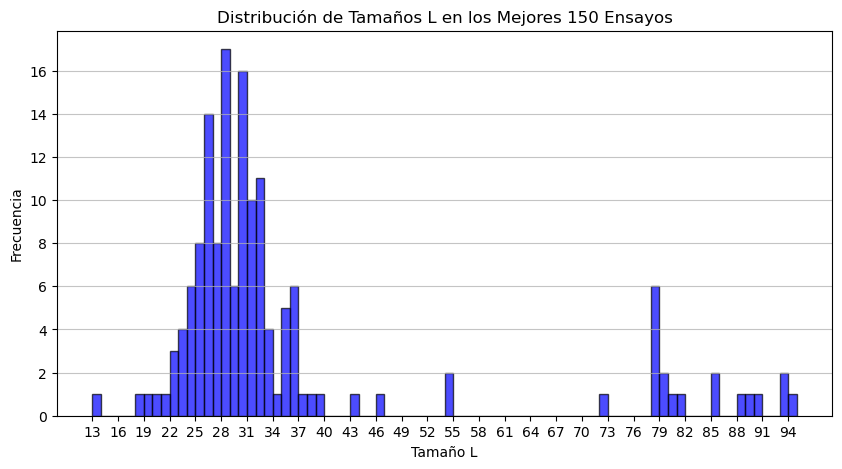

In [4]:
study_names = [trial.study_name for trial in best_trials_global]
network_types = [trial.params['Tipo_red'] for trial in best_trials_global]
sizes = [trial.params['L'] for trial in best_trials_global]  # Recopilar tamaños L

# Contar las frecuencias
study_frequency_count = defaultdict(int)
network_type_frequency_count = defaultdict(int)
size_frequency_count = defaultdict(int)

for study in study_names:
    study_frequency_count[study] += 1

for network_type in network_types:
    network_type_frequency_count[network_type] += 1

for size in sizes:
    size_frequency_count[size] += 1  # Contar la frecuencia de cada tamaño L

# Mostrar la frecuencia de aparición de cada estudio en los mejores 150 ensayos
print("\nFrecuencia de aparición de cada estudio en los mejores 150 ensayos:")
for study_name, count in study_frequency_count.items():
    print(f"Estudio {study_name}: {count} veces")

# Mostrar la frecuencia de cada tipo de red en los mejores 150 ensayos
print("\nFrecuencia de cada tipo de red en los mejores 150 ensayos:")
for network_type, count in network_type_frequency_count.items():
    print(f"Tipo de red {network_type}: {count} veces")

# # Mostrar la frecuencia de cada tamaño L en los mejores 150 ensayos
# print("\nFrecuencia de cada tamaño L en los mejores 150 ensayos:")
# for size, count in size_frequency_count.items():
#     print(f"Tamaño L {size}: {count} veces")

mean_size = np.mean(sizes)
print(f"\nMedia del tamaño L en los mejores 150 ensayos: {mean_size}")

# Graficar la distribución de los tamaños L
plt.figure(figsize=(10, 5))
plt.hist(sizes, bins=range(min(sizes), max(sizes) + 1), alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución de Tamaños L en los Mejores 150 Ensayos')
plt.xlabel('Tamaño L')
plt.ylabel('Frecuencia')
plt.xticks(range(min(sizes), max(sizes) + 1,3))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [5]:
# Directorio donde están almacenados los estudios
study_directory = "Estudios/small_word"  # Asegúrate de que este sea el directorio correcto

# Ruta completa para la base de datos (asume que todas están en formato SQLite)
storage_prefix = "sqlite:///"

# Lista para almacenar los mejores ensayos de todos los estudios
all_trials_global = []

# Listar todos los archivos en el directorio de estudios que tengan la extensión .db
for file_name in os.listdir(study_directory):
    if file_name.endswith(".db"):  # Filtrar solo los archivos .db
        study_name = file_name.replace(".db", "")  # Obtener el nombre del estudio sin la extensión .db
        
        # Cargar el estudio
        study = optuna.load_study(study_name=study_name, storage=storage_prefix + os.path.join(study_directory, file_name))
        
        # Filtrar los ensayos válidos
        valid_trials = [t for t in study.trials if t.values is not None]
        
        # Agregar los ensayos válidos a la lista global
        for trial in valid_trials:
            trial.study_name = study_name  # Asignar el nombre del estudio al ensayo
            all_trials_global.append(trial)

# Ordenar todos los ensayos válidos de todos los estudios por la suma de los valores de los objetivos
best_trials_global = sorted(all_trials_global, key=lambda t: sum(t.values))[:150]  # Tomar los mejores 150

for i, trial in enumerate(best_trials_global[:15]):
    print(f"Global Trial {i + 1}:")
    print("Study:", trial.study_name)
    print("Params:", trial.params)
    print("Values:", trial.values)
    print("Sum of Values:", sum(trial.values))
    print("---------------------------------------")


Global Trial 1:
Study: 4bandas_SW_max
Params: {'L': 21, 'P': 0.5635804882441886, 'Inh': 0.23845027535410002, 'Trest': -3.634114726794281, 'Trelative': 2.662134728730421, 'C_h': 28.839480035569522, 'Tipo_red': 2}
Values: [12.838852301832388]
Sum of Values: 12.838852301832388
---------------------------------------
Global Trial 2:
Study: 4bandas_SW_max
Params: {'L': 21, 'P': 0.6231112576439813, 'Inh': 0.27048906764116254, 'Trest': -2.0418183586186807, 'Trelative': 2.2861184643581356, 'C_h': 29.680329935189206, 'Tipo_red': 2}
Values: [12.875962398731069]
Sum of Values: 12.875962398731069
---------------------------------------
Global Trial 3:
Study: 4bandas_SW_Z_score
Params: {'L': 35, 'P': 0.058406437301845054, 'Inh': 0.3433686709507399, 'Trest': 0.30162712353347204, 'Trelative': 6.537317292300574, 'C_h': 17.41649920113669, 'Tipo_red': 1}
Values: [13.098719678847665]
Sum of Values: 13.098719678847665
---------------------------------------
Global Trial 4:
Study: 4bandas_SW_max
Params: {'


Frecuencia de aparición de cada estudio en los mejores 150 ensayos:
Estudio 4bandas_SW_max: 65 veces
Estudio 4bandas_SW_Z_score: 85 veces

Frecuencia de cada tipo de red en los mejores 150 ensayos:
Tipo de red 2: 68 veces
Tipo de red 1: 82 veces

Media del tamaño L en los mejores 150 ensayos: 28.713333333333335


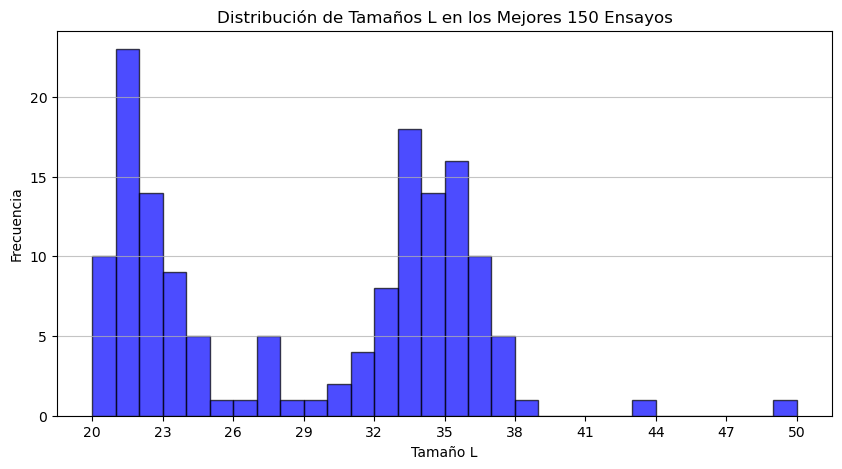

In [6]:
study_names = [trial.study_name for trial in best_trials_global]
network_types = [trial.params['Tipo_red'] for trial in best_trials_global]
sizes = [trial.params['L'] for trial in best_trials_global]  # Recopilar tamaños L

# Contar las frecuencias
study_frequency_count = defaultdict(int)
network_type_frequency_count = defaultdict(int)
size_frequency_count = defaultdict(int)

for study in study_names:
    study_frequency_count[study] += 1

for network_type in network_types:
    network_type_frequency_count[network_type] += 1

for size in sizes:
    size_frequency_count[size] += 1  # Contar la frecuencia de cada tamaño L

# Mostrar la frecuencia de aparición de cada estudio en los mejores 150 ensayos
print("\nFrecuencia de aparición de cada estudio en los mejores 150 ensayos:")
for study_name, count in study_frequency_count.items():
    print(f"Estudio {study_name}: {count} veces")

# Mostrar la frecuencia de cada tipo de red en los mejores 150 ensayos
print("\nFrecuencia de cada tipo de red en los mejores 150 ensayos:")
for network_type, count in network_type_frequency_count.items():
    print(f"Tipo de red {network_type}: {count} veces")

# # Mostrar la frecuencia de cada tamaño L en los mejores 150 ensayos
# print("\nFrecuencia de cada tamaño L en los mejores 150 ensayos:")
# for size, count in size_frequency_count.items():
#     print(f"Tamaño L {size}: {count} veces")

mean_size = np.mean(sizes)
print(f"\nMedia del tamaño L en los mejores 150 ensayos: {mean_size}")

# Graficar la distribución de los tamaños L
plt.figure(figsize=(10, 5))
plt.hist(sizes, bins=range(min(sizes), max(sizes) + 1), alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución de Tamaños L en los Mejores 150 Ensayos')
plt.xlabel('Tamaño L')
plt.ylabel('Frecuencia')
plt.xticks(range(min(sizes), max(sizes) + 1,3))
plt.grid(axis='y', alpha=0.75)
plt.show()